In [1]:
#Name: Sydney Huppert
#ChiPy Mentorship Fall 2017
#Data refining!

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import os as os
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer

def processTweets(file, filler_words):  
    hits = {}
    total_tweets = 0
    condensed_tweets = pd.read_json(file)
    #isolate text column
    tweet_texts = [t.encode('utf-8').decode('ascii', errors='ignore') for t in condensed_tweets['text']]
    #total_tweets += len(tweet_texts)
    for tweet in tweet_texts:
        tweet_tokens = t_tokenizer.tokenize(tweet)
        tweet_tokens = [wnl.lemmatize(t) for t in tweet_tokens]
        tweet = []
        if 'rt' not in tweet_tokens:
            total_tweets += 1
            for w in tweet_tokens:
                if w not in filler_words and w.find('//') and (w.isalnum() or w.startswith('@')):
                    if w in hits:
                        hits[w] = hits[w] + 1
                    else:
                        hits[w] = 1
    return total_tweets, hits

#years_avail = ['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']
years_avail=['2016']
file_string = '/Users/sydne/Documents/Chipy Tweets/'
files = {"Trump": os.path.join(file_string, 'condensed_2016.json'), 'Clinton': os.path.join(file_string, 'hrc_2016.json')}
t_tokenizer = TweetTokenizer(preserve_case=False)
wnl = WordNetLemmatizer()

In [2]:
#Loop through all of the files and store the frequencies
#time to look for words
filler_words = set(stopwords.words('english'))

filler_words.add('.')
filler_words.add(',')
filler_words.add('//')
filler_words.add(':')
filler_words.add('https')
filler_words.add('\i')
tweet_data = {name: processTweets(file, filler_words) for name, file in files.items()}
compare = {}

import operator
for name, (total_tweets, data) in tweet_data.items():
    words_ordered = sorted(data.items(), key=operator.itemgetter(1), reverse=True)
    compare[name] = list(words_ordered)[:500]
    print("%s (Total: %s): %s" % (name, total_tweets, list(words_ordered)[:250]))


Trump (Total: 4036): [('thank', 636), ('great', 595), ('hillary', 456), ('trump', 402), ('@realdonaldtrump', 333), ('clinton', 283), ('america', 281), ('people', 280), ('wa', 275), ('make', 252), ('ha', 243), ('new', 233), ('crooked', 229), ('get', 223), ('vote', 201), ('u', 192), ('cruz', 192), ('poll', 173), ('job', 167), ('join', 166), ('time', 160), ('big', 159), ('president', 148), ('today', 144), ('going', 132), ('like', 132), ('never', 131), ('tonight', 130), ('ted', 129), ('one', 127), ('would', 126), ('country', 126), ('want', 126), ('many', 125), ('win', 125), ('state', 119), ('bad', 114), ('tomorrow', 113), ('watch', 106), ('back', 104), ('american', 104), ('last', 103), ('support', 103), ('said', 101), ('medium', 100), ('enjoy', 100), ('night', 98), ('@cnn', 97), ('@foxnews', 97), ('campaign', 97), ('show', 95), ('say', 94), ('rally', 94), ('much', 91), ('crowd', 90), ('ohio', 89), ('year', 88), ('florida', 88), ('iowa', 88), ('million', 87), ('see', 87), ('love', 86), ('da

In [3]:
overlap_data = {name: [i[0] for i in tweet_data] for name, tweet_data in compare.items()}
overlap_comp = set(overlap_data['Trump']).intersection(set(overlap_data['Clinton']))
print(list(sorted(overlap_comp)))

['1', '100', '2016', '4', '8', '@realdonaldtrump', 'act', 'ago', 'agree', 'almost', 'also', 'always', 'america', 'american', 'another', 'answer', 'anyone', 'anything', 'asked', 'attack', 'away', 'back', 'behind', 'believe', 'best', 'better', 'big', 'bill', 'born', 'bring', 'business', 'call', 'called', 'campaign', 'candidate', 'cannot', 'care', 'carolina', 'chance', 'change', 'child', 'city', 'clinton', 'close', 'come', 'company', 'could', 'country', 'day', 'deal', 'debate', 'democrat', 'doe', 'donald', 'done', 'economy', 'election', 'end', 'energy', 'even', 'ever', 'every', 'everyone', 'fact', 'family', 'far', 'fight', 'first', 'fix', 'florida', 'foreign', 'forward', 'friend', 'future', 'get', 'getting', 'give', 'go', 'going', 'good', 'got', 'great', 'gun', 'guy', 'h', 'ha', 'hampshire', 'happen', 'happy', 'hard', 'hear', 'help', 'hillary', 'history', 'home', 'honor', 'hope', 'house', 'immigration', 'important', 'iowa', 'job', 'join', 'justice', 'keep', 'know', 'la', 'last', 'law', 'l

In [4]:
#What words did they say that the other didn't?
wordcount_lk = {name: dict(tweet_data) for name, tweet_data in compare.items()}
trump_unique = set(overlap_data['Trump']) - (set(overlap_data['Clinton']))
clinton_unique = set(overlap_data['Clinton']) - (set(overlap_data['Trump']))
trump_wc = wordcount_lk['Trump']
clinton_wc = wordcount_lk['Clinton']
print(list(sorted(list(trump_unique), key = lambda word: trump_wc[word]))[::-1])
print(list(sorted(list(clinton_unique), key = lambda word: clinton_wc[word]))[::-1])

['crooked', 'cruz', 'ted', 'bad', 'enjoy', 'medium', '@foxnews', '@cnn', 'rally', 'crowd', 'wow', 'amazing', 'rubio', 'bernie', 'interviewed', 'soon', 'totally', 'ad', 'morning', 'dishonest', 'ticket', '@nytimes', 'total', 'lie', 'news', '@megynkelly', 'pennsylvania', 'failing', 'w', 'special', 'movement', 'south', 'isi', 'nice', 'border', 'beat', 'video', 'wonderful', 'c', 'interest', 'sad', 'jeb', 'p', 'failed', 'north', 'sander', 'massive', 'rating', 'watching', 'marco', 'endorsement', 'rigged', 'indiana', 'email', 'nevada', 'looking', 'lyin', 'virginia', 'disaster', 'pm', 'number', 'kasich', 'arizona', 'colorado', 'meeting', 'john', 'interview', 'politician', '@foxandfriends', 'hit', 'wisconsin', 'fox', 'gave', 'little', 'true', 'phony', '@hillaryclinton', 'governor', '@mike_pence', 'washington', 'yesterday', 'report', 'weak', 'evening', 'gop', 'statement', '@oreillyfactor', 'v', 'convention', 'bush', 'lightweight', 'event', 'false', 'cnn', 'michigan', 'leaving', 'yet', 'terrible',

In [5]:
def find_ats(name, tweet_dict):
    at_list = [token for token in tweet_dict.keys() if '@' in token]
    return at_list

#print(wordcount_lk['Clinton'])
    
hrc_ats = find_ats('Clinton', wordcount_lk['Clinton'])
trump_ats = find_ats('Trump', wordcount_lk['Trump'])
print(hrc_ats)
print(trump_ats)

['@potus', '@flotus', '@realdonaldtrump', '@timkaine', '@billclinton', '@joebiden', '@berniesanders', '@elizabethforma']
['@realdonaldtrump', '@cnn', '@foxnews', '@nytimes', '@megynkelly', '@foxandfriends', '@hillaryclinton', '@mike_pence', '@oreillyfactor', '@seanhannity', '@tedcruz', '@', '@morning_joe', '@jebbush']


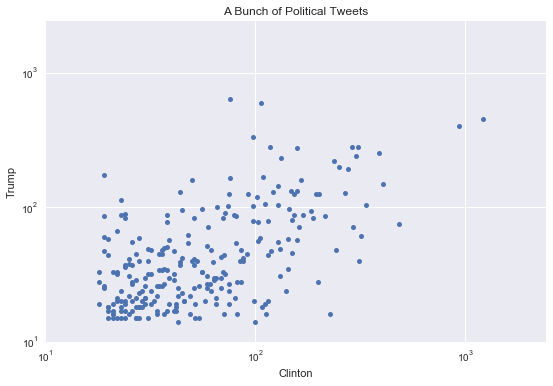

In [11]:
#Scatter plot
x_coordinates = [wordcount_lk['Clinton'][word] for word in overlap_comp]
y_coordinates = [wordcount_lk['Trump'][word] for word in overlap_comp]
#print(x_coordinates)
plt.grid('on')
plt.loglog(x_coordinates, y_coordinates, 'o', ms=5, lw=0)
plt.ylim((10, 2*max(x_coordinates)))
plt.xlim((10, 2*max(x_coordinates)))
plt.xlabel('Clinton')
plt.ylabel('Trump')
plt.title('A Bunch of Political Tweets')


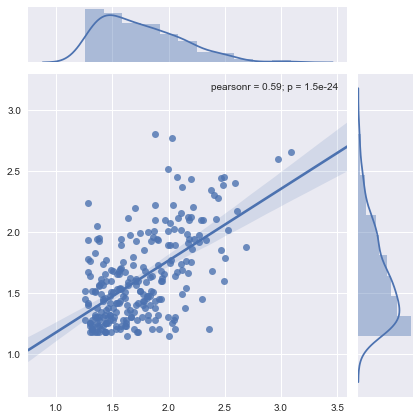

In [16]:
import seaborn as sns
sns.jointplot(np.log10(x_coordinates), np.log10(y_coordinates),kind="reg")